# Preliminary Look at the Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from targetandmarket.config import data_folder

## Import Data

In [2]:
user_data = pd.read_csv(data_folder/'user_analytics.csv', index_col=0)
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106983 entries, 0 to 106982
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               106983 non-null  float64
 1   sessions              106983 non-null  float64
 2   last_session          106983 non-null  float64
 3   total_time            106983 non-null  float64
 4   avg_session           106983 non-null  float64
 5   first_open            106983 non-null  float64
 6   active_days           106983 non-null  int64  
 7   numberOfTransactions  106983 non-null  int64  
 8   numberOfCoins         106983 non-null  int64  
 9   holdings              106983 non-null  float64
 10  isPro                 106983 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 9.8 MB


## Exploration

**Let's look at the label (free or paying user)**

0    103022
1      3961
Name: isPro, dtype: int64


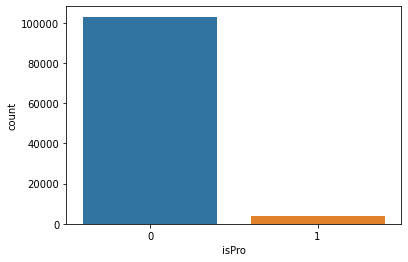

In [3]:
print(user_data.isPro.value_counts())
sns.countplot(user_data.isPro);

**Classes are heavily imbalanced as expected. Only 3961 (3.7%) users are paying users.**

**Now let's look at the features**

In [4]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106983 entries, 0 to 106982
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   user_id               106983 non-null  float64
 1   sessions              106983 non-null  float64
 2   last_session          106983 non-null  float64
 3   total_time            106983 non-null  float64
 4   avg_session           106983 non-null  float64
 5   first_open            106983 non-null  float64
 6   active_days           106983 non-null  int64  
 7   numberOfTransactions  106983 non-null  int64  
 8   numberOfCoins         106983 non-null  int64  
 9   holdings              106983 non-null  float64
 10  isPro                 106983 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 14.8 MB


In [5]:
user_data.describe()

,user_id,sessions,last_session,total_time,avg_session,first_open,active_days,numberOfTransactions,numberOfCoins,holdings,isPro
count,1.069830e+05,106983.000000,106983.000000,106983.000000,106983.000000,106983.000000,106983.000000,106983.000000,106983.000000,1.069830e+05,106983.000000
mean,1.073834e+09,29.500827,7.566145,2301.867718,63.583109,468.369907,10.195975,194.506800,14.486507,2.882569e+04,0.037025
std,6.191869e+08,54.657689,8.676141,6852.649534,73.499378,281.342064,10.276373,1642.139111,20.758112,2.627479e+05,0.188823
min,1.562000e+04,1.000000,0.083335,10.001000,10.001000,31.041667,1.000000,1.000000,1.000000,1.001104e+01,0.000000
25%,5.373065e+08,2.000000,0.531571,76.483500,26.231043,215.125000,2.000000,7.000000,4.000000,4.472162e+02,0.000000
50%,1.073229e+09,6.000000,3.406444,292.221000,42.052462,436.583333,5.000000,22.000000,8.000000,2.022098e+03,0.000000
75%,1.610456e+09,28.000000,13.117607,1393.364500,72.972571,742.083333,17.000000,80.000000,17.000000,9.184168e+03,0.000000
max,2.147438e+09,537.000000,31.083196,167764.425000,1744.580000,942.958333,31.000000,150646.000000,399.000000,9.950672e+06,1.000000


In [6]:
def plot_corr_map(data):
    f, ax = plt.subplots(figsize=(10, 6))
    corr = data.corr()
    hm = sns.heatmap(round(corr, 2),
                     annot=True,
                     ax=ax,
                     cmap="coolwarm",
                     fmt='.2f',
                     linewidths=.05,
                    center=0)
    f.subplots_adjust(top=0.93)
    t = f.suptitle('User Data Correlation Heatmap', fontsize=16)
    return f

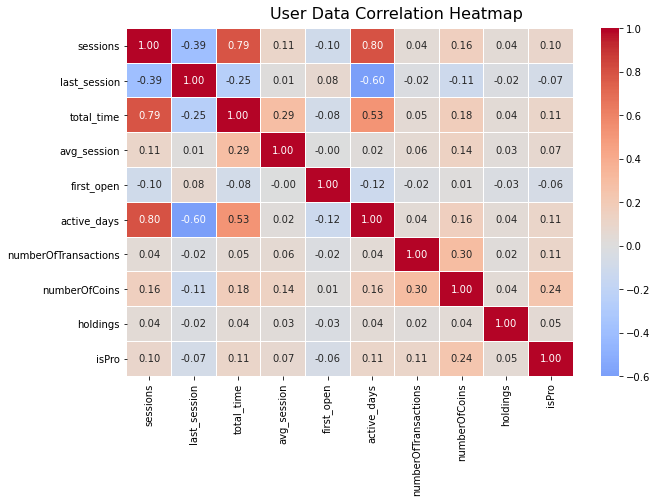

In [7]:
fig1 = plot_corr_map(user_data.drop(['user_id'], axis=1))

In [20]:
def plot_qcutx_y(data, X, Y):
    plt.figure(figsize=(12,6))
    sns.barplot(
        x=data.groupby(by=pd.qcut(data[X], 4)).mean().index,
        y=data.groupby(by=pd.qcut(data[X], 4)).mean()[Y]);

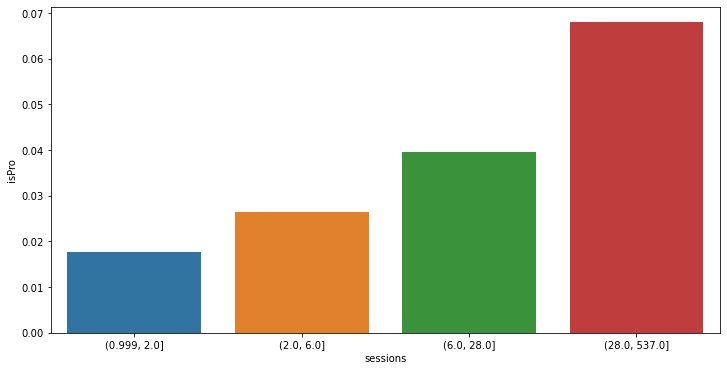

In [21]:
# Ratio of premium users vs number of sessions
fig = plot_qcutx_y(user_data, 'sessions', 'isPro')

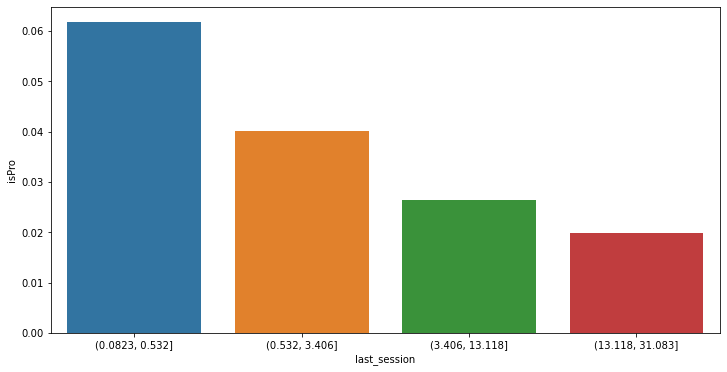

In [23]:
# Ratio of premium users vs number of last_session
fig = plot_qcutx_y(user_data, 'last_session', 'isPro')

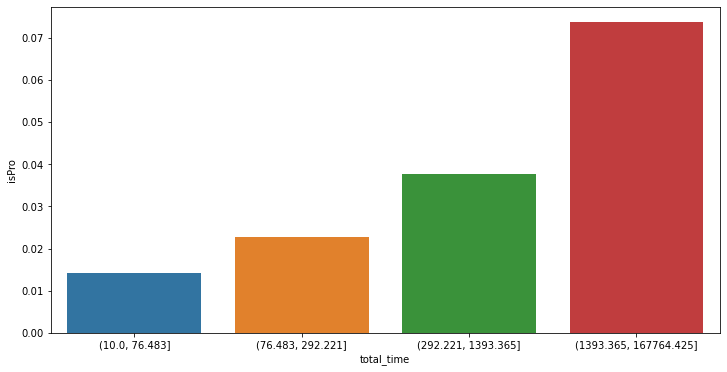

In [24]:
# Ratio of premium users vs total engagement time
fig = plot_qcutx_y(user_data, 'total_time', 'isPro')

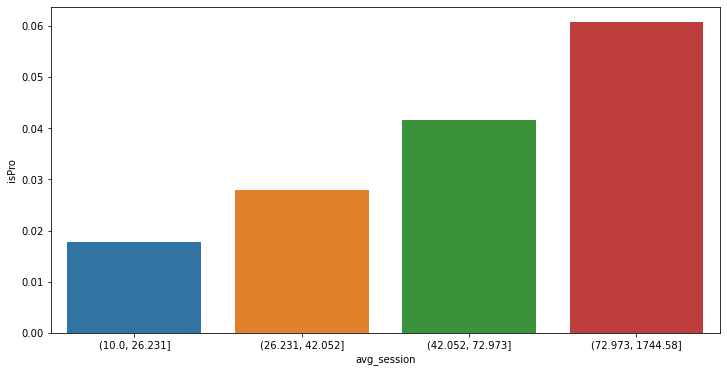

In [25]:
# Ratio of premium users vs Average session time
fig = plot_qcutx_y(user_data, 'avg_session', 'isPro')

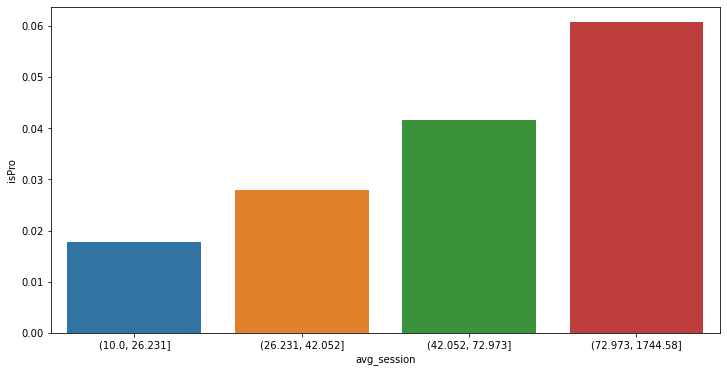

In [26]:
# Ratio of premium users vs Value of investments (holdings)
fig = plot_qcutx_y(user_data, 'avg_session', 'isPro')

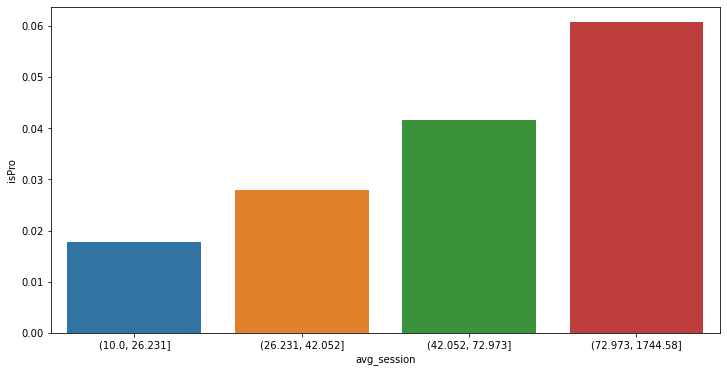

In [27]:
# Ratio of premium users vs Number of transactions
fig = plot_qcutx_y(user_data, 'avg_session', 'isPro')

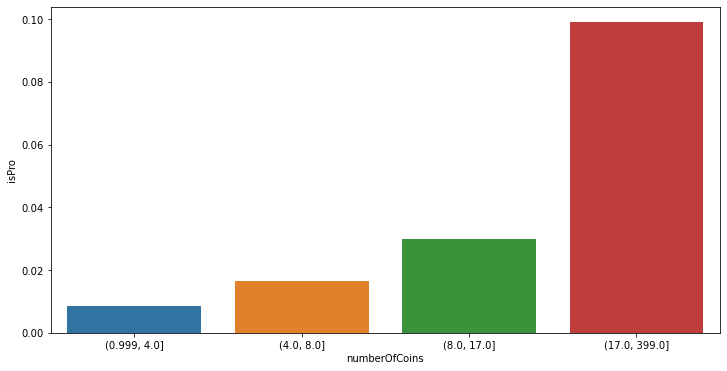

In [29]:
# Ratio of premium users vs Number of coins
fig = plot_qcutx_y(user_data, 'numberOfCoins', 'isPro')

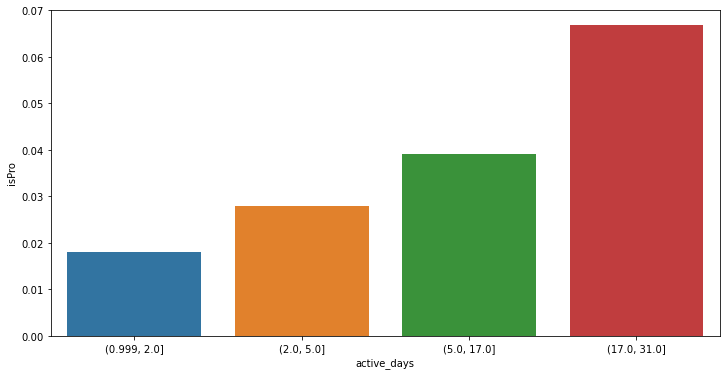

In [30]:
# Ratio of premium users vs Number of active days in May 2020
fig = plot_qcutx_y(user_data, 'active_days', 'isPro')